In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga y limpieza de datos

## (Hecho con la info obtenida en el notebook LimpiezaDeDatos)

In [2]:
#import io
#ruta = io.StringIO(uploaded['train.csv'].decode('utf-8'))
ejemplo =  pd.read_csv('data/ejemploRespuesta.csv', names = ["id", "precio"] )
test =  pd.read_csv('data/test.csv', parse_dates = ['fecha'])
train = pd.read_csv('data/train.csv',parse_dates = ['fecha'])

In [3]:
#A los nulls los relleno con el promedio de metroscubiertos de todas las publicaciones
train['metroscubiertos']=train['metroscubiertos'].fillna(round(train['metroscubiertos'].mean()))
test['metroscubiertos']=test['metroscubiertos'].fillna(round(test['metroscubiertos'].mean()))
#Luego convierto metroscubiertos a  np.int16
train['metroscubiertos']=train['metroscubiertos'].astype(np.int16)
test['metroscubiertos']=test['metroscubiertos'].astype(np.int16)

In [4]:
#A los nulls los relleno con el promedio de metrostotales de todas las publicaciones
train['metrostotales']=train['metrostotales'].fillna(round(train['metrostotales'].mean()))
test['metrostotales']=test['metrostotales'].fillna(round(test['metrostotales'].mean()))
#Luego convierto metrostotales a  np.int16
train['metrostotales']=train['metrostotales'].astype(np.int16)
test['metrostotales']=test['metrostotales'].astype(np.int16)

In [5]:
#El precio promedio de las publicaciones que no tienen datos de cant de habitaciones esta entre el precio
#promedio de las que tienen 2 y 3 habitaciones
#Entonces voy a asumir que tienen 3 habitaciones, ya que es el valor al cual el precio mas se les asemeja.
train['habitaciones']=train['habitaciones'].fillna(3)
test['habitaciones']=test['habitaciones'].fillna(3)
#Luego convierto a np.int8
train['habitaciones']=train['habitaciones'].astype(np.int8)
test['habitaciones']=test['habitaciones'].astype(np.int8)

In [6]:
#A los que no tienen datos de antiguedad los relleno con la antiguedad promedio (es 8)
train['antiguedad']=train['antiguedad'].fillna(round(train['antiguedad'].mean()))
test['antiguedad']=test['antiguedad'].fillna(round(train['antiguedad'].mean()))
#Luego convierto a np.uint8
train['antiguedad']=train['antiguedad'].astype(np.uint8)
test['antiguedad']=test['antiguedad'].astype(np.uint8)

In [7]:
#El precio promedio de los que tienen NULL en garage es parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['garages']=train['garages'].fillna(2)
test['garages']=test['garages'].fillna(2)
#convierto a np.int8
train['garages']=train['garages'].astype(np.int8)
test['garages']=test['garages'].astype(np.int8)

In [8]:
#El precio promedio de los que tienen NULL en banos es mas parecido al de los que tienen 2.
#Relleno los nulls de esta columna con un 2.
train['banos']=train['banos'].fillna(2)
test['banos']=test['banos'].fillna(2)
#convierto a np.int8
train['banos']=train['banos'].astype(np.int8)
test['banos']=test['banos'].astype(np.int8)

In [9]:
train['gimnasio']=train['gimnasio'].astype(np.int8)
train['usosmultiples']=train['usosmultiples'].astype(np.int8)
train['piscina']=train['piscina'].astype(np.int8)
train['escuelascercanas']=train['escuelascercanas'].astype(np.int8)
train['centroscomercialescercanos']=train['centroscomercialescercanos'].astype(np.int8)
test['gimnasio']=test['gimnasio'].astype(np.int8)
test['usosmultiples']=test['usosmultiples'].astype(np.int8)
test['piscina']=test['piscina'].astype(np.int8)
test['escuelascercanas']=test['escuelascercanas'].astype(np.int8)
test['centroscomercialescercanos']=test['centroscomercialescercanos'].astype(np.int8)

In [10]:
#Creo categoria para los que no tienen categoria en provincia:
train['provincia']=train['provincia'].fillna('N/A')
test['provincia']=test['provincia'].fillna('N/A')
#Creo categoria para los que no tienen categoria en ciudad:
train['ciudad']=train['ciudad'].fillna('N/A')
test['ciudad']=test['ciudad'].fillna('N/A')
#Relleno los nulls en direccion con un - .
train['direccion']=train['direccion'].fillna('-')
test['direccion']=test['direccion'].fillna('-')
#Creo categoria para los que no tienen categoria en tipodepropiedad:
train['tipodepropiedad']=train['tipodepropiedad'].fillna('N/A')
test['tipodepropiedad']=test['tipodepropiedad'].fillna('N/A')

In [11]:
train['titulo']=train['titulo'].fillna(' ')
train['descripcion']=train['descripcion'].fillna(' ')
test['titulo']=test['titulo'].fillna(' ')
test['descripcion']=test['descripcion'].fillna(' ')

In [12]:
train['precio']=train['precio'].astype(np.int32)
train['id']=train['id'].astype(np.int32)
test['id']=test['id'].astype(np.int32)

In [13]:
#Algunas columnas tienen nulls que no se como encararlos. Por ahora los relleno con 0
train=train.fillna(0)
test=test.fillna(0)

# Armado de features:

In [14]:
train.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [15]:
test.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos'],
      dtype='object')

## OneHotEncoding para tipodepropiedad

In [16]:
#Voy a usar OneHotEncoder para convertir la columna categorica tipodepropiedad en dummies.
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
dummies = enc.fit_transform(train['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies = pd.DataFrame(dummies)
dummies_test = enc.transform(test['tipodepropiedad'].values.reshape(-1, 1)).toarray()
dummies_test = pd.DataFrame(dummies_test)

In [17]:
dummies.columns=enc.categories_[0].tolist()
dummies=dummies.add_prefix('prop_')
dummies=dummies.astype(np.int8)

dummies_test.columns=enc.categories_[0].tolist()
dummies_test=dummies_test.add_prefix('prop_')
dummies_test=dummies_test.astype(np.int8)

In [18]:
dummies.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,...,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dummies_test.head()

,prop_Apartamento,prop_Bodega comercial,prop_Casa,prop_Casa en condominio,prop_Casa uso de suelo,prop_Departamento Compartido,prop_Duplex,prop_Edificio,prop_Garage,prop_Hospedaje,...,prop_N/A,prop_Nave industrial,prop_Oficina comercial,prop_Otros,prop_Quinta Vacacional,prop_Rancho,prop_Terreno,prop_Terreno comercial,prop_Terreno industrial,prop_Villa
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## OneHotEncoding para provincias

In [20]:
#Voy a usar OneHotEncoder para convertir la columna categorica provincia en dummies.
from sklearn.preprocessing import OneHotEncoder
enc_prov = OneHotEncoder()
dummies_prov = enc_prov.fit_transform(train['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov = pd.DataFrame(dummies_prov)

dummies_prov_test = enc_prov.transform(test['provincia'].values.reshape(-1, 1)).toarray()
dummies_prov_test = pd.DataFrame(dummies_prov_test)

In [21]:
dummies_prov.columns=enc_prov.categories_[0].tolist()
dummies_prov=dummies_prov.add_prefix('prov_')
dummies_prov=dummies_prov.astype(np.int8)

dummies_prov_test.columns=enc_prov.categories_[0].tolist()
dummies_prov_test=dummies_prov_test.add_prefix('prov_')
dummies_prov_test=dummies_prov_test.astype(np.int8)

In [22]:
dummies_prov.head()

,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,...,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
dummies_prov_test.head()

,prov_Aguascalientes,prov_Baja California Norte,prov_Baja California Sur,prov_Campeche,prov_Chiapas,prov_Chihuahua,prov_Coahuila,prov_Colima,prov_Distrito Federal,prov_Durango,...,prov_Quintana Roo,prov_San luis Potosí,prov_Sinaloa,prov_Sonora,prov_Tabasco,prov_Tamaulipas,prov_Tlaxcala,prov_Veracruz,prov_Yucatán,prov_Zacatecas
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Features sobre el tiempo

En el TP1 vimos como los precios iban en aumento a medida que el tiempo aumentaba, por lo que nos interesa crear nuevos features tomando en cuenta el tiempo en el que se publicaron las propiedades.


Para realizar un nuevo feature comenzaremos añadiendo un peso para cada fecha, este peso irá en aumento a medida que las fechas van subiendo, así simularemos el crecimiento del precio a lo largo del tiempo.

In [24]:
#Califico las fechas de acuerdo a la diferencia entre la fecha actual y la fecha mínima sobre el máximo de dias
fecha_min = train.fecha.min()
fecha_max = train.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
def calificar_fecha(fecha):
    delta = fecha - fecha_min
    return delta.days/delta_max_days

In [25]:
train["puntaje_por_fecha"] = train['fecha'].transform(lambda x: calificar_fecha(x))
train.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,puntaje_por_fecha
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,8,2,1,...,0.0,0.0,2015-08-23,0,0,0,0,0,2273000,0.728368


In [26]:
#Set de test
fecha_min = test.fecha.min()
fecha_max = test.fecha.max()
delta_max_days = (fecha_max - fecha_min).days
test["puntaje_por_fecha"] = test['fecha'].transform(lambda x: calificar_fecha(x))
test.head(1)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,puntaje_por_fecha
0,4941,"casa en venta en miguel hidalgo, distrito federal",<p>excelente casa estilo moderno.</p>,Casa,Bosque de Cedros,Miguel Hidalgo,Distrito Federal,29,3,2,...,0.0,19.408668,-99.246767,2013-07-20,0,0,0,0,0,0.309967


## Features descripcion

Para el primer TP descubrimos que habia ciertas palabras que estaban correlacionadas a mayor precio y otras a menor precio. Usando esa informacion vamos a armar features que nos digan si la descripcion tiene o no determinada palabra

In [27]:
#Paso todas las descripciones a minúscula para contar las palabras con mas precision
train['descripcion']=train['descripcion'].apply(lambda x: x.lower())

In [28]:
Palabras_mayor_precio=['cuarto','vestidor','terraza','family','vista','bodega',\
                       'salón','estudio','jardín','room','jacuzzi','lujo','antecomedor',\
                       'tv','fiestas','juegos','estacionamiento','gimnasio','nado',\
                       'lugares','doble','desayunador','servicio','chimenea','visita',\
                       'acabado','espacio','salon','alberca','garden','spa']
Palabras_menor_precio=['minutos','acept','boiler','reja','credito','transporte'\
                      ,'cochera','contado','escuela','inf','fovissste','cerca',\
                      'bancario','protecciones','patio','infonavit']
Palabras=Palabras_mayor_precio + Palabras_menor_precio

In [29]:
prueba=train.head(5)

In [30]:
dummies_palabras_descr=pd.DataFrame()
#Por cada palabra en la lista genero una columna que diga si la descripcion contenia esa palabra o no
for palabra in Palabras:
    dummies_palabras_descr[palabra]=train['descripcion'].apply(lambda x: palabra in x).astype(np.int8)
#Renombro estas columnas agregandoles un prefijo
dummies_palabras_descr=dummies_palabras_descr.add_prefix('desc_')

In [31]:
dummies_palabras_descr.head(3)

,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,...,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,0


In [32]:
dummies_palabras_descr_test=pd.DataFrame()
#Hago lo mismo para el set de test
for palabra in Palabras:
    dummies_palabras_descr_test[palabra]=test['descripcion'].apply(lambda x: palabra in x).astype(np.int8)
dummies_palabras_descr_test=dummies_palabras_descr_test.add_prefix('desc_')

In [33]:
dummies_palabras_descr_test.head()

,desc_cuarto,desc_vestidor,desc_terraza,desc_family,desc_vista,desc_bodega,desc_salón,desc_estudio,desc_jardín,desc_room,...,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Definiendo X e Y para entrenar y X_test para predecir

In [34]:
Numericos=['antiguedad','habitaciones','garages','banos','metroscubiertos',\
            'metrostotales','gimnasio','usosmultiples','piscina','escuelascercanas',\
            'centroscomercialescercanos','puntaje_por_fecha']

In [35]:
X=train[Numericos]
X=X.join(dummies)
X=X.join(dummies_prov)
X=X.join(dummies_palabras_descr)
Y=train['precio']

In [36]:
X.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,8,2,1,2,80,80,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,3,2,2,268,180,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,5,3,2,2,144,166,0,0,0,0,...,0,0,1,1,0,1,0,0,1,0
3,1,2,1,1,63,67,0,0,0,1,...,0,0,1,1,1,0,0,0,0,1
4,10,2,1,1,95,95,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
Y.head()

0    2273000
1    3600000
2    1200000
3     650000
4    1150000
Name: precio, dtype: int32

In [38]:
X_test = test[Numericos]
X_test=X_test.join(dummies_test)
X_test=X_test.join(dummies_prov_test)
X_test=X_test.join(dummies_palabras_descr_test)
X_test.head()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,gimnasio,usosmultiples,piscina,escuelascercanas,...,desc_cochera,desc_contado,desc_escuela,desc_inf,desc_fovissste,desc_cerca,desc_bancario,desc_protecciones,desc_patio,desc_infonavit
0,29,3,2,4,300,176,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,1,1,1,67,67,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2,1,2,87,100,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3,2,2,2,2,86,86,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,10,2,1,1,80,76,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [39]:
#para ahorrar memoria borramos los df que ya no vamos a usar:
del dummies
del dummies_test
del dummies_prov
del dummies_prov_test
del dummies_palabras_descr
del dummies_palabras_descr_test

# Armado de modelos

In [40]:
def crear_submit(model, x_train, y_train, x_test, nombre):
    model.fit(x_train, y_train)
    result = model.predict(x_test)
    final = test.loc[:, ['id']]
    final['target'] = result
    ruta = "data/submit"+ nombre +".csv"
    final.to_csv(path_or_buf = ruta, index = False )
    df = pd.read_csv(ruta)
    return df

In [41]:
from sklearn import preprocessing 
def normalizar_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    np_scaled = min_max_scaler.fit_transform(df)
    return pd.DataFrame(np_scaled)

In [42]:
from sklearn.model_selection import cross_val_score

# BaseLine para nuestros modelos

## (1) KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
#Por default toma n = 5
KNN_model = KNeighborsRegressor()

In [ ]:
KNN_model.fit(X,Y)

**Mido el resultado de knn utilizando la métrica MAE**

In [ ]:
# Con cross validation y n=5
scores = cross_val_score(KNN_model , X, Y, scoring="neg_mean_absolute_error", cv=4)
KNN_mae_score1 = -scores.mean()
KNN_mae_score1

# Otra Alternativa
from sklearn import metrics 
from sklearn.model_selection import train_test_split 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = None)   

KNN_model.fit(X_train, Y_train) 
  
Y_pred = KNN_model.predict(X_test) 
  
KNN_mae_score2 = metrics.mean_absolute_error(Y_test, Y_pred) 
KNN_mae_score2


## (2) Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
scores = cross_val_score(LR_model , X, Y, scoring="neg_mean_absolute_error", cv=4)
LR_score1 = -scores.mean()

In [ ]:
LR_score1

**Evidentemente es mucho peor que KNN**

## (3) Árbol de Decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DTR_model = DecisionTreeRegressor()
scores = cross_val_score(DTR_model , X, Y, scoring="neg_mean_absolute_error", cv=4)
DTR_score1 = -scores.mean()
DTR_score1

# Probamos más modelos

## (1) Random Forest

In [46]:
from sklearn.ensemble  import RandomForestRegressor

RF_model=RandomForestRegressor(n_estimators=60)

#RF_model.fit(X,Y)

### MAE score para RF

In [44]:
scores = cross_val_score(RF_model , X, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score1 = -scores.mean()
RF_mae_score1

637345.845690031

In [47]:
RF_model.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=60,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [48]:
importancias = pd.DataFrame(RF_model.feature_importances_,index=X.columns,columns=['importancia']).reset_index()
importancias.columns = ['feature', 'importancia']

In [49]:
importancias=importancias.sort_values(by='importancia',ascending=False)

(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 10 Text yticklabel objects>)

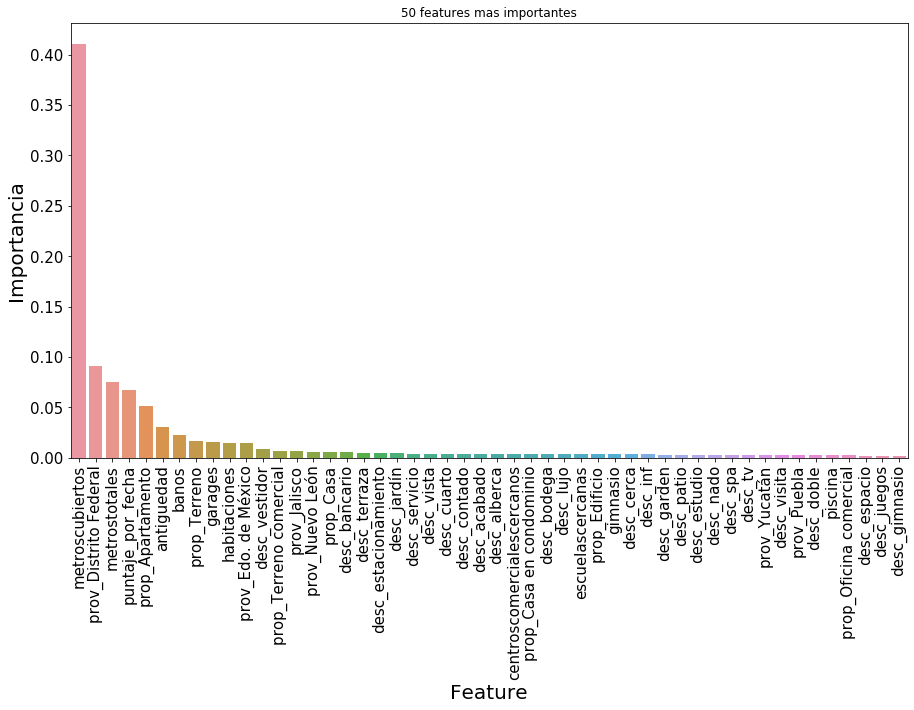

In [50]:
import seaborn as sns
plt.figure(figsize = (15,8))
#Muestro los 50 mas importantes
graf = sns.barplot(x = importancias.feature.head(50), y = importancias.importancia.head(50))
graf.set_title("50 features mas importantes")
graf.set_xlabel("Feature", fontsize = 20)
graf.set_ylabel("Importancia", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

(array([0.    , 0.0002, 0.0004, 0.0006, 0.0008, 0.001 , 0.0012, 0.0014,
        0.0016, 0.0018]), <a list of 10 Text yticklabel objects>)

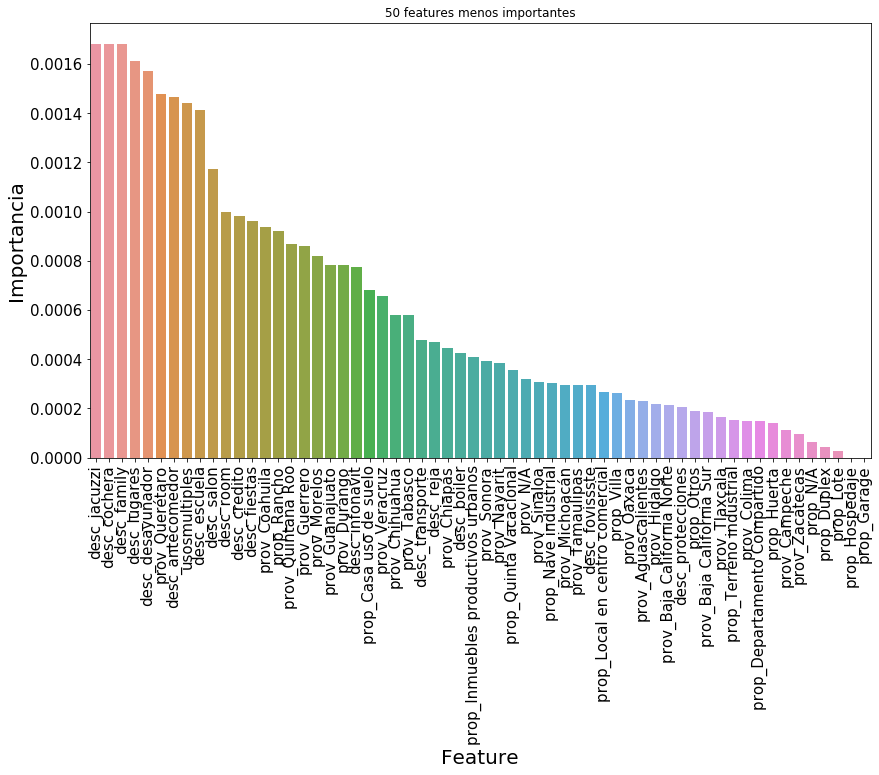

In [51]:
import seaborn as sns
plt.figure(figsize = (15,8))
#Muestro los 50 menos importantes
graf = sns.barplot(x = importancias.feature.tail(60), y = importancias.importancia.tail(60), orient = 'v')
graf.set_title("50 features menos importantes")
graf.set_xlabel("Feature", fontsize = 20)
graf.set_ylabel("Importancia", fontsize = 20)
plt.xticks(fontsize = 15, rotation = 'vertical')
plt.yticks(fontsize = 15)

## (2) Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

GBR_model = GradientBoostingRegressor()
scores = cross_val_score(GBR_model , X, Y, scoring="neg_mean_absolute_error", cv=5)
GBR_mae_score1 = -scores.mean()
GBR_mae_score1

774678.7743226123

## submit

In [43]:
df = crear_submit(GBR_model, X_normalized,Y, X_test_normalized, "GBR_normalized")
df.head()

NameError: name 'X_normalized' is not defined

## Submit con Random Forest

## Hago un submit con los datos normalizados

In [50]:
X_normalized = normalizar_data(X)
X_test_normalized = normalizar_data(X_test)

In [53]:
X_test_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,107,108,109,110,111,112,113,114,115,116
0,0.3625,0.222222,0.666667,1.000000,0.672170,0.379717,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.1000,0.000000,0.333333,0.000000,0.122642,0.122642,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.111111,0.333333,0.333333,0.169811,0.200472,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0250,0.111111,0.666667,0.333333,0.167453,0.167453,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.1250,0.111111,0.333333,0.000000,0.153302,0.143868,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
scores = cross_val_score(RF_model , X_normalized, Y, scoring="neg_mean_absolute_error", cv=3)
RF_mae_score1 = -scores.mean()
RF_mae_score1

NameError: name 'RF_model' is not defined

In [201]:
Y.head()

0    2273000
1    3600000
2    1200000
3     650000
4    1150000
Name: precio, dtype: int32

In [52]:
submit1 = crear_submit(RF_model,X_normalized, Y, X_test_normalized, "RF_normalized")
submit1.head()

,id,target
0,4941,4.405675e+06
1,51775,9.632973e+05
2,115253,2.449850e+06
3,299321,1.170583e+06
4,173570,6.495167e+05


import xgboost as xgb

xgb_model=xgb.XGBClassifier(random_state=1)

scores = cross_val_score(xgb_model , X, Y, scoring="neg_mean_absolute_error", cv=2)
GBR_mae_score1 = -scores.mean()
GBR_mae_score1

xgb_model.fit(X,Y)